<a href="https://colab.research.google.com/github/theofil/CompPhysics/blob/master/examples/electrostatic_potential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# written by Konstantinos Theofilatos (05.10.19)
# draws the electrostatic potential for an arbitrary 
# configuration of electric charges, using brute force
# and bisection root finding
import numpy as np
import matplotlib.pyplot as plt

def bisection(f, a , b, tol = 1.e-7, Nmax = 10000, n = 0):
    c = -9.999e+300
    while abs(b-a) > tol and n < Nmax: 
        if np.sign(f(a))*np.sign(f(b)) > 0:
          #  print('f(%2.4f)*f(%2.4f) = %2.4f thus it\'s problematic'%(a , b, f(a)*f(b)))
            break
        c = a + (b-a)*0.5
        if(abs(f(c))<1.e-6): break       
        if np.sign(f(c))*np.sign(f(b)) < 0:
            a = c
        if np.sign(f(a))*np.sign(f(c)) < 0:
            b = c
        n = n + 1
    #print('root at best effort is %2.6f [n = %d]'%(c, n))
    return c

def distance(r1, r2):
    res = (((r1-r2).T@(r1-r2))**0.5)[0,0]
    if res < 1.e-9: 
        res = 1.e-9
        print('divergence occured for \n r1 = \n', r1, '\n r2 = \n', r2)
    return res

class particle:
    '''particles live in 2D, having x, y coordinates and charge q'''
    def __init__(self, x, y, q):
        self.x = x
        self.y = y
        self.q = q
        self.r = np.array([[x], [y]])

def V(x, y):
    r = np.array([[x], [y]])
    #res = k*(q1/distance(r, r1) + q2/distance(r, r2) + q3/distance(r, r3))
    res = 0.
    k = 1.
    for p in particles:
        q_i = p.q
        r_i = p.r
        res += k*q_i/distance(r, r_i)
    return res

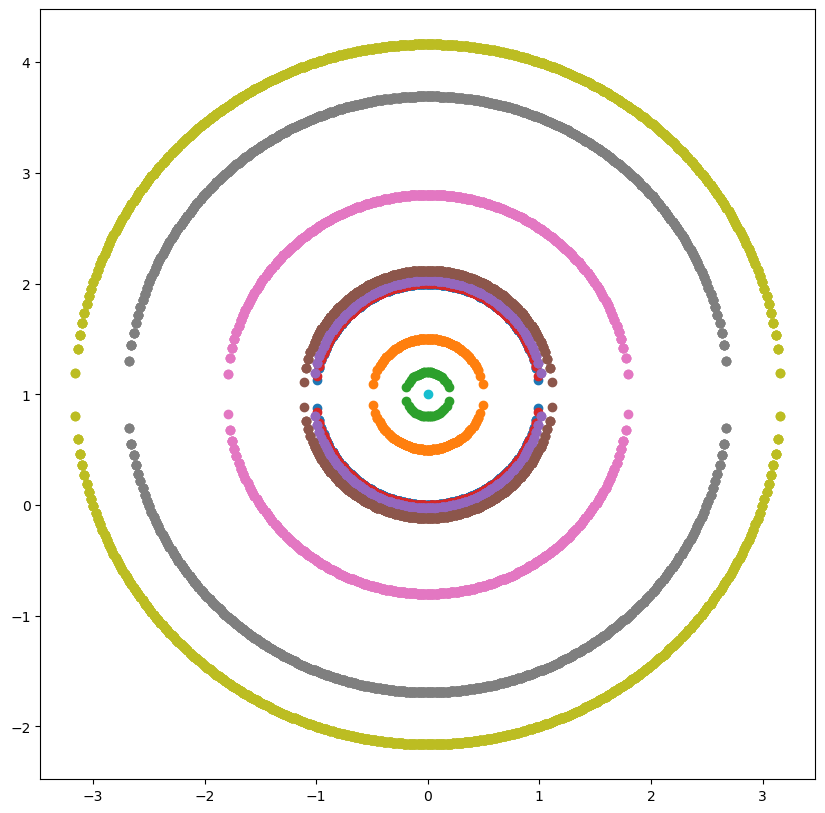

In [2]:
# example 0
# position the particles in grid, define its charge
particles = []
particles += [particle( 0,   1,  1)]

# arrays with the positions  of our particles
chargesX = [p.x for p in particles]
chargesY = [p.y for p in particles]

# create our canvas
ax, fig = plt.subplots(figsize=(10,10))

# calculate iso-potential
x_steps  = 500
y_slices = 50
grid_x = np.linspace(-5, 5, x_steps)
refVs = [ V(0., 0.),  V(0, 0.5), V(0, 0.8), V(0.1, 0), V(0.25, 0), V(0.5, 0), V(1.5, 0), V(2.5, 0), V(3.0, 0)] 
for (i, refV) in enumerate(refVs):
    iso_x = []
    iso_y = []
    for x in grid_x:
        f  = lambda y: V(x,y) - refV
        for y in np.linspace(grid_x[0], grid_x[-1], y_slices):
            a = y + 0.5
            b = y - 0.5
            x = x
            y = bisection(f, a, b)
            if y == -9.999e+300: continue
            iso_x += [x]
            iso_y += [y]
    plt.scatter(iso_x, iso_y)
plt.scatter(chargesX, chargesY)

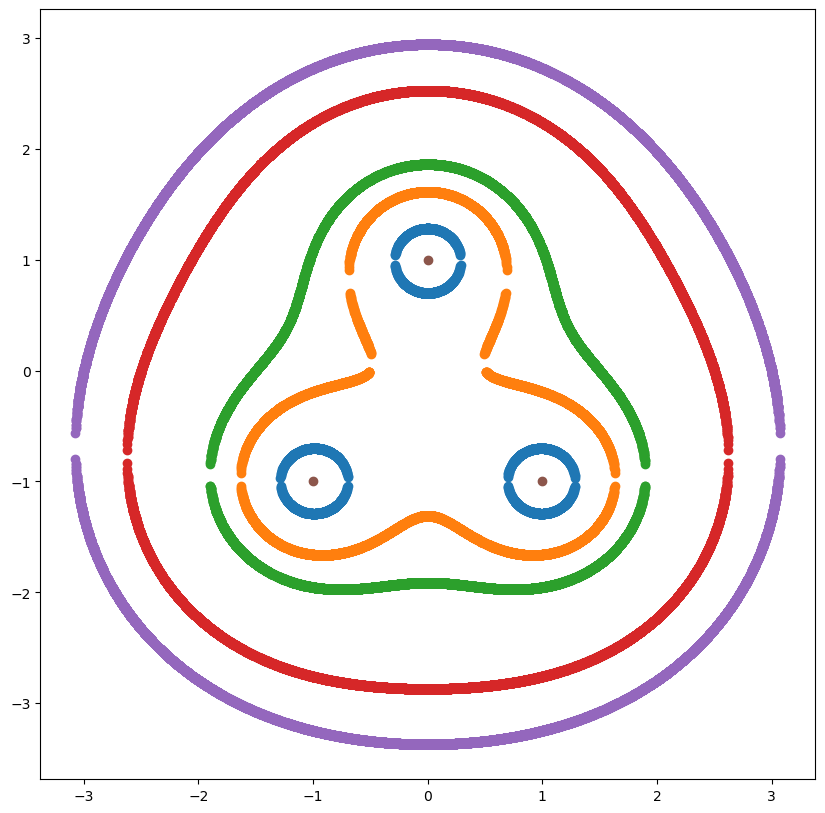

In [3]:
# example 1
# position the particles in grid, define its charge
particles = []
particles += [particle( 0,   1,  1)]
particles += [particle( 1,  -1,  1)]
particles += [particle(-1,  -1,  1)]

# arrays with the positions  of our particles
chargesX = [p.x for p in particles]
chargesY = [p.y for p in particles]

# create our canvas
ax, fig = plt.subplots(figsize=(10,10))

# calculate iso-potential
x_steps  = 5000
y_slices = 50
grid_x = np.linspace(-5, 5, x_steps)
refVs = [ V(0, 0.7), V(-0.5, 0), V(1.5, 0), V(2.5, 0), V(3.0, 0)]
#refVs = [V(0., 0.), V(0.5, 0), V(1.5, 0), V(2.5, 0), V(3.0, 0)]
for (i, refV) in enumerate(refVs):
    iso_x = []
    iso_y = []
    for x in grid_x:
        f  = lambda y: V(x,y) - refV
        for y in np.linspace(grid_x[0], grid_x[-1], y_slices):
            a = y + 0.5
            b = y - 0.5
            x = x
            y = bisection(f, a, b)
            if y == -9.999e+300: continue
            iso_x += [x]
            iso_y += [y]
    plt.scatter(iso_x, iso_y)
plt.scatter(chargesX, chargesY)

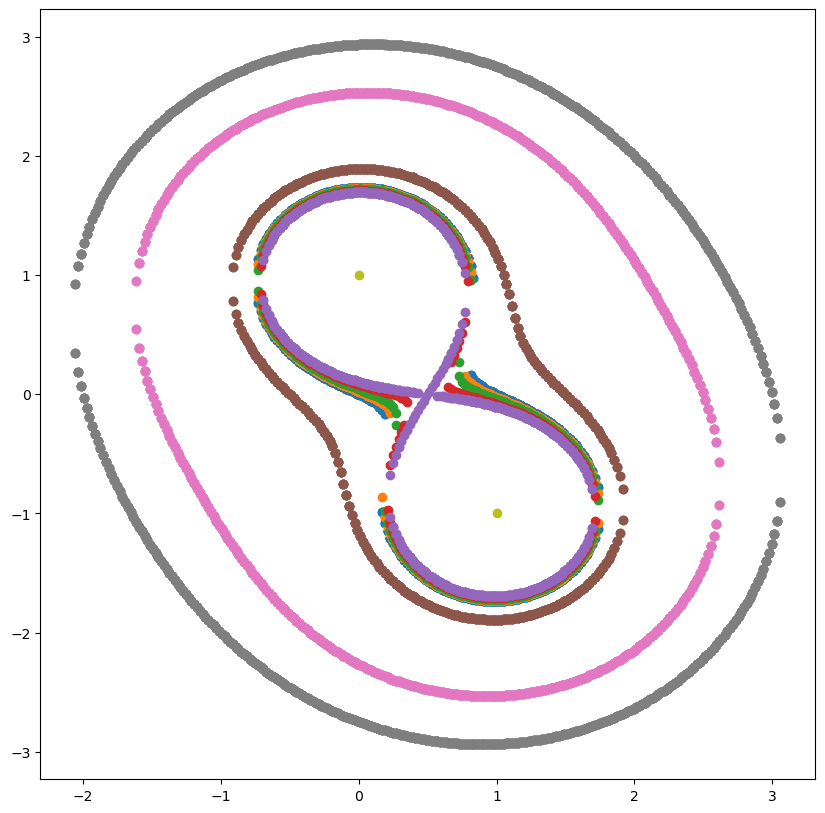

In [4]:
# example 2
# position the particles in grid, define its charge
particles = []
particles += [particle( 0,   1,  1)]
particles += [particle( 1,  -1,  1)]

# arrays with the positions  of our particles
chargesX = [p.x for p in particles]
chargesY = [p.y for p in particles]

# create our canvas
ax, fig = plt.subplots(figsize=(10,10))

# calculate iso-potential
x_steps  = 500
y_slices = 50
grid_x = np.linspace(-5, 5, x_steps)
refVs = [ V(0., 0.),  V(0.05, 0), V(0.1, 0), V(0.25, 0), V(0.5, 0), V(1.5, 0), V(2.5, 0), V(3.0, 0)] 
for (i, refV) in enumerate(refVs):
    iso_x = []
    iso_y = []
    for x in grid_x:
        f  = lambda y: V(x,y) - refV
        for y in np.linspace(grid_x[0], grid_x[-1], y_slices):
            a = y + 0.5
            b = y - 0.5
            x = x
            y = bisection(f, a, b)
            if y == -9.999e+300: continue
            iso_x += [x]
            iso_y += [y]
    plt.scatter(iso_x, iso_y)
plt.scatter(chargesX, chargesY)

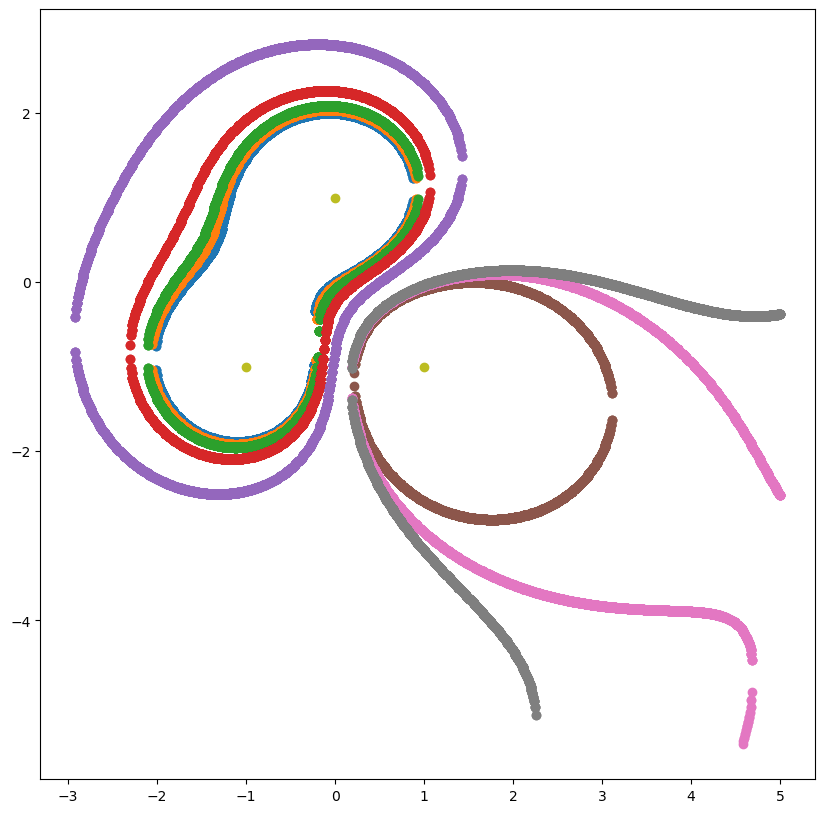

In [5]:
# example 3
# position the particles in grid, define its charge
particles = []
particles += [particle( 0,   1,  1)]
particles += [particle( 1,  -1,  -1)]
particles += [particle(-1,  -1,  1)]

# arrays with the positions  of our particles
chargesX = [p.x for p in particles]
chargesY = [p.y for p in particles]

# create our canvas
ax, fig = plt.subplots(figsize=(10,10))

# calculate iso-potential
x_steps  = 1000
y_slices = 100
grid_x = np.linspace(-5, 5, x_steps)
#refVs = [ V(0, 0.7), V(-0.5, 0), V(1.5, 0), V(2.5, 0), V(3.0, 0)] 
refVs = [ V(0., 0.),  V(0.05, 0), V(0.1, 0), V(0.25, 0), V(0.5, 0), V(1.5, 0), V(2.5, 0), V(3.0, 0)] 

for (i, refV) in enumerate(refVs):
    iso_x = []
    iso_y = []
    for x in grid_x:
        f  = lambda y: V(x,y) - refV
        for y in np.linspace(grid_x[0], grid_x[-1], y_slices):
            a = y + 0.5
            b = y - 0.5
            x = x
            y = bisection(f, a, b)
            if y == -9.999e+300: continue
            iso_x += [x]
            iso_y += [y]
    plt.scatter(iso_x, iso_y)
plt.scatter(chargesX, chargesY)

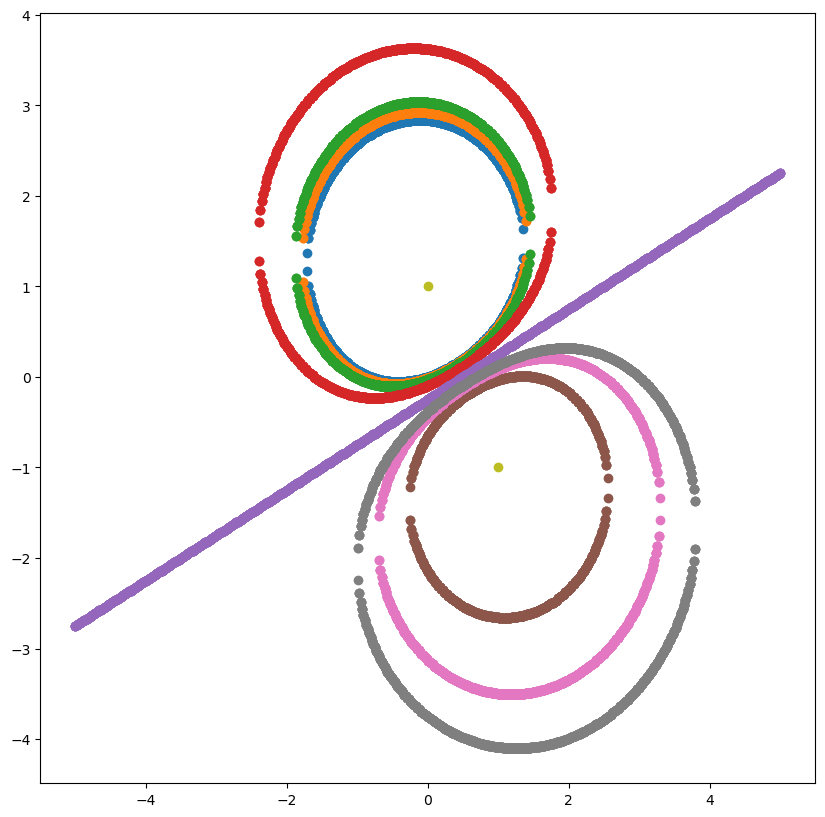

In [6]:
# example 4
# position the particles in grid, define its charge
particles = []
particles += [particle( 0,   1,  1)]
particles += [particle( 1,  -1,  -1)]

# arrays with the positions  of our particles
chargesX = [p.x for p in particles]
chargesY = [p.y for p in particles]

# create our canvas
ax, fig = plt.subplots(figsize=(10,10))

# calculate iso-potential
x_steps  = 500
y_slices = 50
grid_x = np.linspace(-5, 5, x_steps)
refVs = [ V(0., 0.),  V(0.05, 0), V(0.1, 0), V(0.25, 0), V(0.5, 0), V(1.5, 0), V(2.5, 0), V(3.0, 0)] 
for (i, refV) in enumerate(refVs):
    iso_x = []
    iso_y = []
    for x in grid_x:
        f  = lambda y: V(x,y) - refV
        for y in np.linspace(grid_x[0], grid_x[-1], y_slices):
            a = y + 0.5
            b = y - 0.5
            x = x
            y = bisection(f, a, b)
            if y == -9.999e+300: continue
            iso_x += [x]
            iso_y += [y]
    plt.scatter(iso_x, iso_y)
plt.scatter(chargesX, chargesY)